In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [2]:
# Exploratory Data Analysis(EDA)
len(os.listdir("C:/Users/panka/Desktop/final_code/Working_project/Plant_leave_diseases_dataset_with_augmentation/train"))

38

In [3]:
#loading our image to data generator
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3, horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [4]:
#load ourimage or 
train = train_datagen.flow_from_directory(directory="C:/Users/panka/Desktop/final_code/Working_project/Plant_leave_diseases_dataset_with_augmentation/train", target_size=(256,256), batch_size=38)
val = val_datagen.flow_from_directory(directory="C:/Users/panka/Desktop/final_code/Working_project/Plant_leave_diseases_dataset_with_augmentation/train", target_size=(256,256), batch_size=38)

Found 43456 images belonging to 38 classes.
Found 43456 images belonging to 38 classes.


In [5]:
t_img , label = train.next()

In [6]:
t_img.shape

(38, 256, 256, 3)

In [7]:
def plotImage(img_arr, label):
  for im , l in zip(img_arr , label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


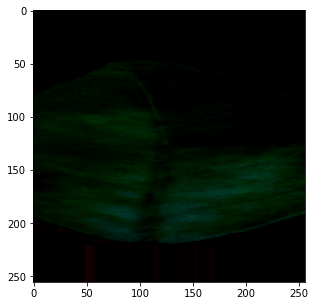

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


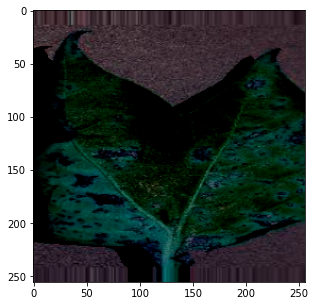

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


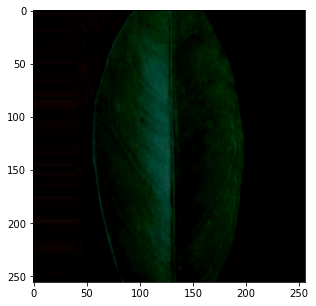

In [8]:
plotImage(t_img[:3],label[:3])

In [9]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [10]:
base_model = VGG19(input_shape=(256,256,3), include_top = False)

In [11]:
for layer in base_model.layers:
  layer.trainable = False

In [12]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [13]:
X = Flatten()(base_model.output)
X = Dense(units = 38, activation = 'softmax')(X)

#creating model
model = Model(base_model.input, X)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [15]:
model.compile(optimizer= 'adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

Early Stopping and model check point

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early Stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.1, patience = 3, verbose = 1)

#model check point
mc = ModelCheckpoint(filepath = "best_model.h5", monitor = 'val_accuracy', min_delta = 0.1, patience = 3, verbose = 1, save_best_only = True)

cb = [es,mc]

In [17]:
his = model.fit(train, steps_per_epoch=16, epochs=10, verbose=1 , callbacks= cb, validation_data= val, validation_steps=16)

Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 21.2586 - accuracy: 0.3273
Epoch 00001: val_accuracy improved from -inf to 0.54605, saving model to best_model.h5
16/16 [==============================] - 42s 1s/step - loss: 21.2586 - accuracy: 0.3273 - val_loss: 15.1517 - val_accuracy: 0.5461
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 10.5090 - accuracy: 0.5921
Epoch 00002: val_accuracy improved from 0.54605 to 0.61842, saving model to best_model.h5
16/16 [==============================] - 23s 1s/step - loss: 10.5090 - accuracy: 0.5921 - val_loss: 11.0275 - val_accuracy: 0.6184
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 9.0271 - accuracy: 0.6184
Epoch 00003: val_accuracy improved from 0.61842 to 0.70230, saving model to best_model.h5
16/16 [==============================] - 22s 1s/step - loss: 9.0271 - accuracy: 0.6184 - val_loss: 6.3872 - val_accuracy: 0.7023
Epoch 4/10
16/16 [==============================] - ETA: 0

In [18]:
#generator function
his = model.fit_generator(train, steps_per_epoch=16, epochs=50, verbose=1 , callbacks= cb, validation_data= val, validation_steps=16)

<ipython-input-18-d4fe046b3968>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train, steps_per_epoch=16, epochs=50, verbose=1 , callbacks= cb, validation_data= val, validation_steps=16)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 6.7387 - accuracy: 0.7516
Epoch 00001: val_accuracy improved from 0.84046 to 0.84375, saving model to best_model.h5
16/16 [==============================] - 23s 1s/step - loss: 6.7387 - accuracy: 0.7516 - val_loss: 3.8030 - val_accuracy: 0.8438
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 6.2088 - accuracy: 0.7533
Epoch 00002: val_accuracy did not improve from 0.84375
16/16 [==============================] - 23s 1s/step - loss: 6.2088 - accuracy: 0.7533 - val_loss: 6.1567 - val_accuracy: 0.8322
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 4.9762 - accuracy: 0.8010
Epoch 00003: val_accuracy did not improve from 0.84375
16/16 [==============================] - 23s 1s/step - loss: 4.9762 - accuracy: 0.8010 - val_loss: 3.5716 - val_accuracy: 0.8322
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 5.2203 - accuracy: 0.7977
Epoch 00004: val_accuracy improved fr

In [19]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

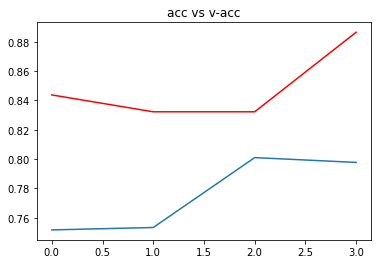

In [20]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

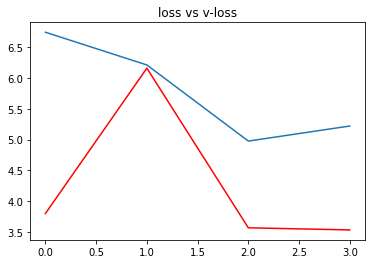

In [21]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

In [22]:
# load best model
from keras.models import load_model
model = load_model("C:/Users/panka/Desktop/final_code/best_model.h5")

In [23]:
acc = model.evaluate(val)[1]
print(f"the accuracy of your model is {acc*100}%")

1144/1144 [==============================] - 724s 633ms/step - loss: 4.0923 - accuracy: 0.8545
the accuracy of your model is 85.45194864273071%


In [24]:
ref = dict(zip(list(train.class_indices.values()),list(val.class_indices.keys())))

In [25]:
def prediction(path):
  img = load_img(path, target_size = (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
#   print(im.shape)
  img = np.expand_dims(im, axis=0)
  pred = np.argmax(model.predict(img))
  print(f"the image belongs to {ref[pred]}")

In [30]:
path ="C:/Users/panka/Desktop/final_code/Working_project/Plant_leave_diseases_dataset_with_augmentation/train/Blueberry___healthy/11dc114c-533f-49f1-bd32-24b0010e9d1d___RS_HL 2309.JPG"
prediction(path)

the image belongs to Blueberry___healthy
